# United States and Canada

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
plt.style.use('ggplot')

## Create CSV files from AWS Redshift queries

### Covid-19 daily cases query

    select ca.last_update, ca.confirmed, ca.deaths, ca.recovered, ca.active, wc.*
    from global.covid19_americas ca
    join global.world_countries wc on wc.country_id = ca.country_id
    where wc.iso3 in ('USA', 'CAN')
    order by wc.iso3, ca.last_update

In [120]:
df_covid19 = pd.read_csv('usa_canada_covid19_cases.csv')

In [121]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_update         797 non-null    object 
 1   confirmed           797 non-null    int64  
 2   deaths              745 non-null    float64
 3   recovered           669 non-null    float64
 4   active              665 non-null    float64
 5   country_id          797 non-null    int64  
 6   iso2                797 non-null    object 
 7   iso3                797 non-null    object 
 8   name                797 non-null    object 
 9   landlocked          797 non-null    object 
 10  latitude            797 non-null    float64
 11  longitude           797 non-null    float64
 12  main_religion_2008  797 non-null    object 
 13  un_state            797 non-null    bool   
 14  world_4region       797 non-null    object 
 15  population          797 non-null    int64  
 16  country_

In [122]:
df_covid19.head(10)

,last_update,confirmed,deaths,recovered,active,country_id,iso2,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region
0,2020-01-26,1,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
1,2020-01-27,1,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
2,2020-01-28,2,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
3,2020-01-29,2,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
4,2020-01-30,3,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
5,2020-01-31,3,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
6,2020-02-01,13,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
7,2020-02-04,42,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
8,2020-02-05,4,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
9,2020-02-07,40,NaN,NaN,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada


In [123]:
df_month_end = df_covid19[df_covid19['last_update'].isin(['2020-03-31','2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31'])]

In [125]:
df_month_end.loc[:, 'confirmed_pct'] = df_month_end['confirmed']/df_month_end['population'] * 100

In [126]:
df_month_end.sort_values(by=['last_update'])

,last_update,confirmed,deaths,recovered,active,country_id,iso2,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region,confirmed_pct
48,2020-03-31,8527,152.0,1592.0,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.022525
449,2020-03-31,188417,3896.0,7024.0,NaN,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.057189
77,2020-04-30,52865,4000.0,20327.0,29383.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.139649
479,2020-04-30,1040925,61239.0,120720.0,858222.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.315943
108,2020-05-31,91681,7857.0,48517.0,36005.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.242185
510,2020-05-31,1772235,103345.0,416461.0,1284150.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.537911
138,2020-06-30,105830,8768.0,68698.0,28504.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.279562
540,2020-06-30,2386689,102650.0,705203.0,1478352.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.724411
169,2020-07-31,117664,9019.0,102331.0,6360.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.310822
571,2020-07-31,4507996,151165.0,1414155.0,2137687.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,1.368272


In [127]:
df_usa = df_month_end[df_month_end['iso3']=='USA']

In [128]:
df_usa

,last_update,confirmed,deaths,recovered,active,country_id,iso2,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region,confirmed_pct
449,2020-03-31,188417,3896.0,7024.0,NaN,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.057189
479,2020-04-30,1040925,61239.0,120720.0,858222.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.315943
510,2020-05-31,1772235,103345.0,416461.0,1284150.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.537911
540,2020-06-30,2386689,102650.0,705203.0,1478352.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,0.724411
571,2020-07-31,4507996,151165.0,1414155.0,2137687.0,196,US,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US,1.368272


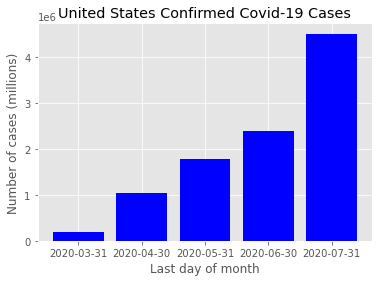

In [129]:
plt.bar(df_usa['last_update'], df_usa['confirmed'],color='blue')
plt.title("United States Confirmed Covid-19 Cases")
plt.xlabel('Last day of month')
plt.ylabel('Number of cases (millions)')
plt.show()

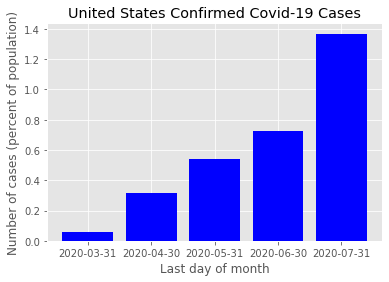

In [130]:
plt.bar(df_usa['last_update'], df_usa['confirmed_pct'],color='blue')
plt.title("United States Confirmed Covid-19 Cases")
plt.xlabel('Last day of month')
plt.ylabel('Number of cases (percent of population)')
plt.show()

In [131]:
df_can = df_month_end[df_month_end['iso3']=='CAN']

In [132]:
df_can

,last_update,confirmed,deaths,recovered,active,country_id,iso2,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region,confirmed_pct
48,2020-03-31,8527,152.0,1592.0,NaN,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.022525
77,2020-04-30,52865,4000.0,20327.0,29383.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.139649
108,2020-05-31,91681,7857.0,48517.0,36005.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.242185
138,2020-06-30,105830,8768.0,68698.0,28504.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.279562
169,2020-07-31,117664,9019.0,102331.0,6360.0,14,CA,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada,0.310822


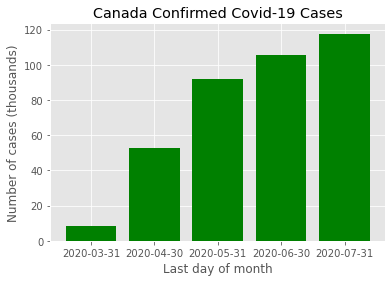

In [135]:
plt.bar(df_can['last_update'], df_can['confirmed']/1000,color='green')
plt.title("Canada Confirmed Covid-19 Cases")
plt.xlabel('Last day of month')
plt.ylabel('Number of cases (thousands)')
plt.show()

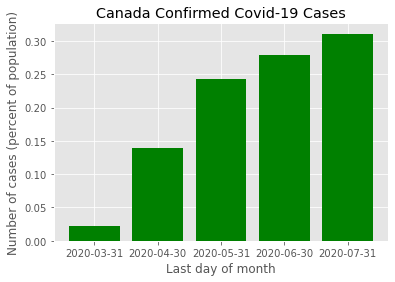

In [136]:
plt.bar(df_can['last_update'], df_can['confirmed_pct'], color='green')
plt.title('Canada Confirmed Covid-19 Cases')
plt.xlabel('Last day of month')
plt.ylabel('Number of cases (percent of population)')
plt.show()

### Gapminder demographics for United States and Canada query

    select wd.*, wc.*
    from global.world_demographics wd
    join global.world_countries wc on wc.country_id = wd.country_id
    where wc.iso3 in ('USA', 'CAN')
    order by wd.country_id, wd.year

In [2]:
df_demographic = pd.read_csv('usa_canada_demographics.csv')

In [3]:
df_demographic.head()

,demographic_id,country_id,year,mean_yrs_sch_men_15_24,mean_yrs_sch_men_25_older,mean_yrs_sch_women_15_24,mean_yrs_sch_women_25_older,female_age_15plus_emp_rate_pct,female_age_15plus_labor_force_partic_rate_pct,female_age_15plus_unemp_rate_pct,...,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region
0,1564,14,2000,12.87,13.5,12.98,13.5,54.7220,58.6480,6.6947,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
1,628,14,2001,12.94,13.6,13.06,13.6,54.9060,58.9490,6.8562,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
2,2236,14,2002,13.02,13.7,13.14,13.6,55.8470,60.1250,7.1249,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
3,364,14,2003,13.10,13.8,13.22,13.7,56.7700,61.1419,7.1577,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
4,76,14,2004,13.18,13.8,13.31,13.8,57.0569,61.2550,6.8529,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada


In [4]:
df_demographic.columns

Index(['demographic_id', 'country_id', 'year', 'mean_yrs_sch_men_15_24',
       'mean_yrs_sch_men_25_older', 'mean_yrs_sch_women_15_24',
       'mean_yrs_sch_women_25_older', 'female_age_15plus_emp_rate_pct',
       'female_age_15plus_labor_force_partic_rate_pct',
       'female_age_15plus_unemp_rate_pct', 'female_life_expectency',
       'female_literacy_rate_pct_15plus', 'male_age_15plus_emp_rate_pct',
       'male_age_15plus_labor_force_partic_rate_pct',
       'male_age_15plus_unemp_rate_pct', 'male_life_expectancy',
       'male_literacy_rate_pct_15plus', 'health_spend_pp_us',
       'health_spend_total_gov_spend_pct', 'age_60_plus_yrs_total_num',
       'total_population', 'total_gdp_ppp_inflation_adj',
       'total_gdp_us_inflation_adj', 'country_id.1', 'iso2', 'iso3', 'name',
       'landlocked', 'latitude', 'longitude', 'main_religion_2008', 'un_state',
       'world_4region', 'population', 'country_region'],
      dtype='object')

In [137]:
df_2019 = df_demographic[df_demographic['year']==2019]

In [138]:
df_2019.head()

,demographic_id,country_id,year,mean_yrs_sch_men_15_24,mean_yrs_sch_men_25_older,mean_yrs_sch_women_15_24,mean_yrs_sch_women_25_older,female_age_15plus_emp_rate_pct,female_age_15plus_labor_force_partic_rate_pct,female_age_15plus_unemp_rate_pct,...,iso3,name,landlocked,latitude,longitude,main_religion_2008,un_state,world_4region,population,country_region
19,604,14,2019,NaN,NaN,NaN,NaN,57.1220,60.4090,NaN,...,CAN,Canada,coastline,60.0,-113.0,christian,True,americas,37855702,Canada
40,2910,196,2019,NaN,NaN,NaN,NaN,53.0019,55.2189,NaN,...,USA,United States,coastline,39.0,-98.0,christian,True,americas,329466283,US


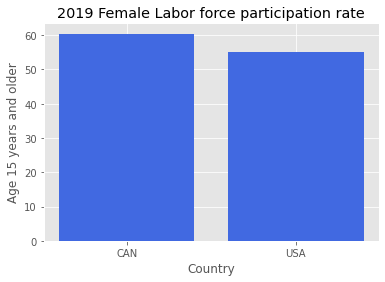

In [142]:
plt.bar(df_2019['iso3'], df_2019['female_age_15plus_labor_force_partic_rate_pct'], color='royalblue')
plt.title('2019 Female Labor force participation rate')
plt.xlabel("Country")
plt.ylabel("Age 15 years and older")
plt.show()